# Week 7 In-Class Activity

This week we are going to practice filtering in the time domain. We will read in monthly mean surface air temperature from Vancouver International Airport weather station from Jan. 1971 - Dec. 2019.

In [47]:
# Load packages
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=14,weight='bold') #set default font size and weight for plots

In [48]:
# Read in temperature data from Vancouver Int'l Airport
filename = 'van.csv'
T = np.squeeze(np.genfromtxt(filename,delimiter=','))

First, let's plot the data to see what it looks like.

In [144]:
# Plot the Vancouver temperature time series


Now, we are going to remove the seasonal cycle using two of the methods that we covered in the courseware:

- the anomaly method
- the running-mean method

Let's get started. 

## Part I: Anomaly Method

This method involves computing the climatological seasonal cycle and then removing it. This method *band-pass* filters the data. Note that it's helpful to reshape the data in order to carry out this method.

In [145]:
# reshape the data
T_reshape = 

Print out the shape of the reshaped data to make sure that you did what you were trying to do.

In [146]:
# print shape of T_reshape


Now, compute the climatological seasonal cycle.

In [51]:
# compute the climatological seasonal cycle
T_clim = 

Plot the climatological seasonal cycle and label the x-axis with the months.

In [147]:
# Plot climatological seasonal cycle


Now, remove the climatological seasonal cycle.

In [53]:
# remove climatological seasonal cycle
T_anom = 

Plot the temperature anomaly, i.e. the temperature with the seasonal cycle removed.

In [148]:
# Plot temperature anomaly


## Part II: Running-Mean Method

This method involves *low-pass* filtering the data to remove the seasonal cycle. Let's give it a try starting with the original variable, `T`. Use the `np.convolve()` function.

In [136]:
# compute running-mean
L = 
T_deseason = 

What is the shape of T_deseason? Why? What happens if we change the mode to `same`? Take a look at the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) for `np.convolve()`. We have already seen this documentation for `np.correlate()`. 

Plot the deseasonalized temperature data. Take a look at how the plots look different depending on which `mode` you use.

In [149]:
# Plot low-pass filtered temperature time series


**Reflection Question:**\
How does the running-mean method compare to the anomaly method? What are the key differences/similarities? What frequencies have been filtered out of this low-pass filtered time series and which remain?

## Alternative to the Running-Mean Filter

In the courseware, I mentioned that alternatives to the running-mean filter could be applied, such that instead of weighting each element of the mean equally, we could apply a functional weighting. Let's take a look at this using a *Gaussian* filter. 

First, we will create a *Gaussian* function for a set of parameters using `st.norm.pdf()`.

In [132]:
# create Gaussian with mean = 0 and sigma = 6
sigma = 6

# define x variable for st.norm.pdf function
window = 6*sigma
x = np.linspace(-int(window / 2), int(window / 2), int(window))

# complete this line
gaus = st.norm.pdf()

We are going to start to visualize what these filters look like if we consider them in their functional form. Plot the *Gaussian* and compare it to the running mean filter. 

Fill in the code below.

(0, 0.09)

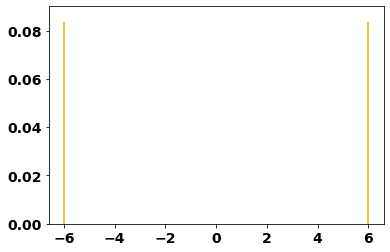

In [150]:
# Plot Gaussian filter
plt.plot()


# generate x-variable for plotting running mean filter
xrm = np.linspace(-L/2, L/2, L)

# Plot running-mean filter
plt.plot()

# add vertical and horizontal lines
plt.vlines(-6,ymin=0,ymax = 1.0/12.0,color='orange')
plt.vlines(6,ymin=0,ymax = 1.0/12.0,color='orange')

# plot adjustments
plt.ylim(0,0.09)

We can think of these filters as sliding along our time series and each time they move one time step, the filter is multiplied by the elements of the time series.

The `np.convolve()` function does this for us. 

In [141]:
# low-pass filter T using Gaussian filter
T_gaus = 

What is the shape of this smoothed time series? Why?

In [151]:
# print shape


In [152]:
# Plot Gaussian low-pass filtered temperature time series


**Reflection Question:**\
How does this smoothed time series compare to the previous two? What are the key differences/similarities? What frequencies have been filtered out of this alternative low-pass filtered time series and which remain?

Over the next two weeks, we will explore why we see differences in the frequencies that we filter out and the ones that remain.

## Part IV: Lower-pass Filter

The Vancouver climate is influenced by ENSO and we can see this variability left over after we have filtered out the seasonal cycle. How would you remove this variability as well? Let's construct a low-pass filter that filters out frequencies up to 7 years. Try constructing this using a running-mean filter and a Gaussian filter.